# Core Imports to Be Used Throughout the Project

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Define, Compile, and Train a Simple Neural Network Model

In [43]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Shape of one image: {X_train[0].shape}")

Training samples: 60000, Test samples: 10000
Shape of one image: (28, 28)


In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

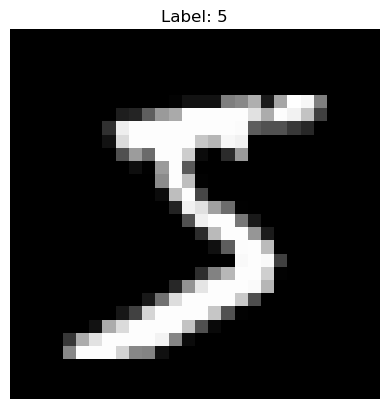

In [46]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
log_dir = "logs/run1"
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [50]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9256 - loss: 0.2615 - val_accuracy: 0.9572 - val_loss: 0.1410
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9662 - loss: 0.1146 - val_accuracy: 0.9679 - val_loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9721 - val_loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9816 - loss: 0.0599 - val_accuracy: 0.9775 - val_loss: 0.0766
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9736 - val_loss: 0.0817


Compile the Neural Network Model

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 97.36%


In [52]:
y_predicted = model.predict(X_test)
y_predicted_labels = np.argmax(y_predicted, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


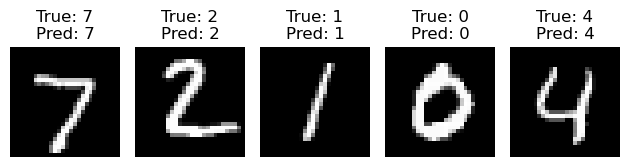

In [54]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [56]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

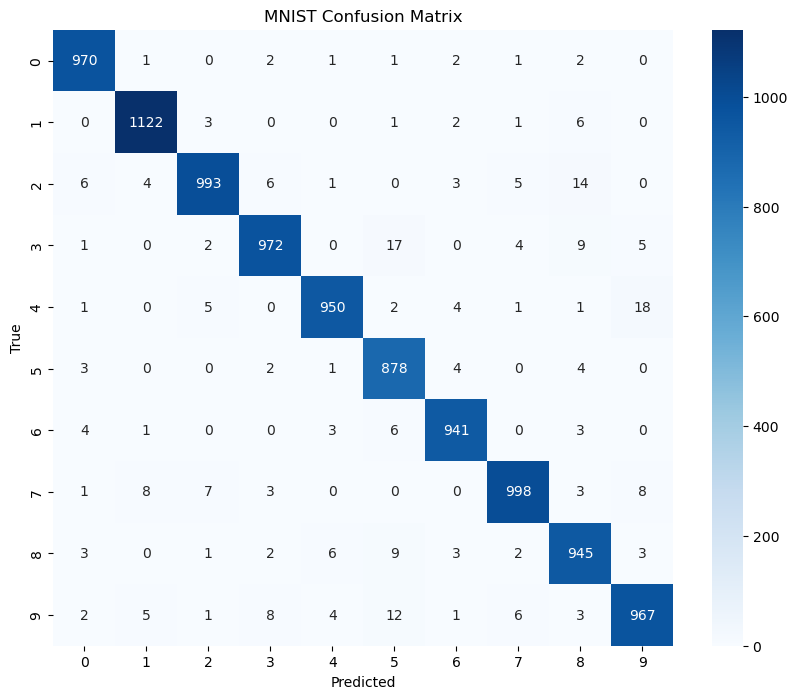

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MNIST Confusion Matrix")
plt.show()

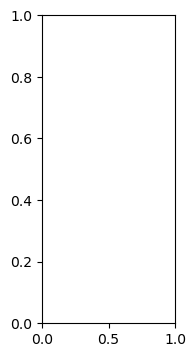

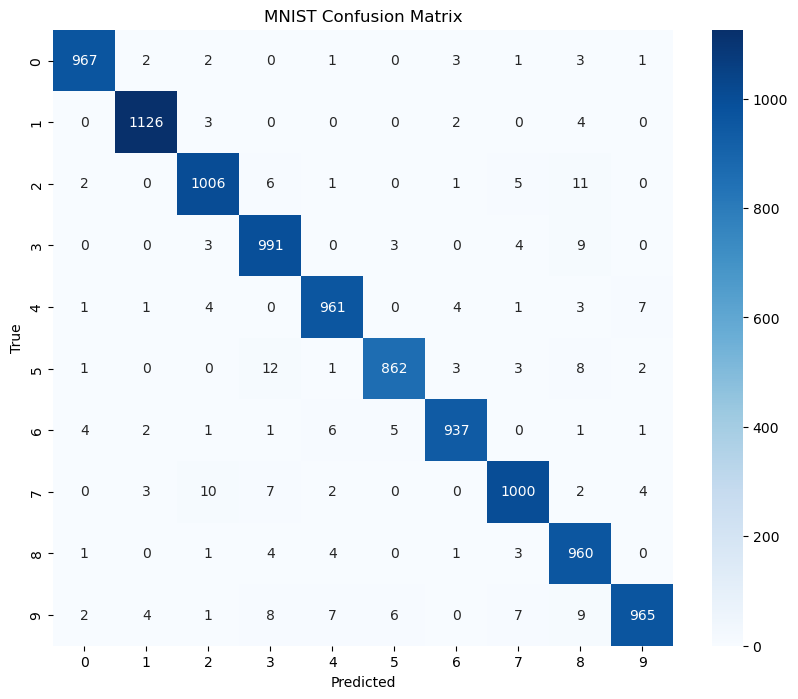

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MNIST Confusion Matrix")
plt.show()

In [27]:
from tensorflow import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
# Correct compile syntax
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8275 - loss: 0.6783
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9051 - loss: 0.3424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9174 - loss: 0.2925
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9266 - loss: 0.2622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9334 - loss: 0.2382


In [28]:
import os
print(os.getcwd())  # Shows where logs/ will be created


C:\Users\muham


In [31]:
if os.path.exists(r"C:\Users\muham"):
    print("Logs folder created:", os.listdir(r"C:\Users\muham"))
else:
    print("Failed to create logs folder")


Logs folder created: ['.anaconda', '.aws', '.conda', '.continuum', '.git', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.m2', '.matplotlib', '.ms-ad', '.VirtualBox', '.vscode', '3D Objects', 'alhabib-catering', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'banglore_home_prices_model.pickle', 'cleaned_bengaluru_house_data.csv', 'columns.json', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Dropbox', 'Favorites', 'get-pip.py', 'IntelGraphicsProfiles', 'iris.dataset.ipynb', 'kfold.ipynb', 'last1.ipynb', 'Links', 'Local Settings', 'logs', 'main.tf', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'New folder', 'New folder (2)', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{34de2609-0134-11f0-93ab-af04369e8b3e}.TM.blf', 'NTUSER.DAT{34de2609-0134-11f0-93ab-af04369e8b3e}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{34de2609-0134-11f0-93ab-af04369e8b3e}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pi

In [35]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 4480), started 0:02:18 ago. (Use '!kill 4480' to kill it.)

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# Dummy data
X_train = np.random.random((100, 28, 28))
y_train = np.random.randint(0, 10, 100)

# Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/run1", histogram_freq=0)

# Compile and train
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, callbacks=[tb_callback])

# Check event files
print("Event files:", os.listdir("logs/run1"))


Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1500 - loss: 2.3401 
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1700 - loss: 2.3282
Event files: ['train']


In [39]:
tensorboard --logdir=logs/run1


Reusing TensorBoard on port 6008 (pid 11148), started 0:02:11 ago. (Use '!kill 11148' to kill it.)

In [40]:
model.get_weights()

[array([[ 0.07254077,  0.0792677 , -0.03409141, ...,  0.07001598,
         -0.0715932 , -0.019909  ],
        [-0.06395754,  0.0432797 , -0.05879631, ...,  0.07487573,
         -0.0684554 , -0.07887612],
        [-0.01227421, -0.04846651, -0.08123209, ..., -0.04689034,
          0.07784626,  0.03221911],
        ...,
        [ 0.06822831,  0.0332296 ,  0.06977806, ..., -0.06673492,
          0.0649806 ,  0.00343297],
        [-0.08143319, -0.038516  , -0.07104181, ...,  0.04539615,
         -0.08087988,  0.01941967],
        [ 0.04351057,  0.03646342,  0.07437955, ...,  0.03008882,
          0.07755743, -0.05913121]], dtype=float32),
 array([-3.80495156e-04,  7.12861598e-04,  3.09379713e-04,  0.00000000e+00,
         1.82882068e-05,  1.05699594e-03,  0.00000000e+00,  7.00639095e-04,
         0.00000000e+00, -1.03758811e-03, -5.76118473e-04, -1.57592032e-04,
        -3.27301328e-04,  9.26530338e-05,  6.01570355e-05, -4.56361828e-04,
         6.70187874e-04,  1.77604205e-04,  5.33512444e